In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

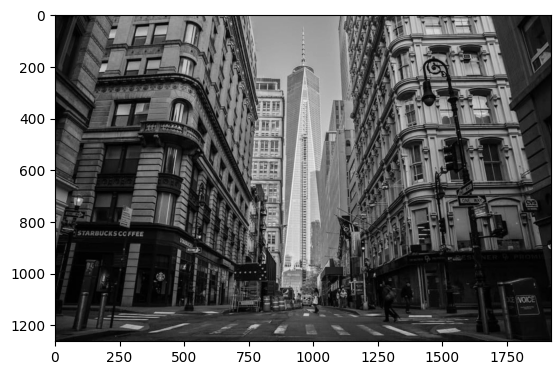

In [6]:
img = cv.imread('images\Corners.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

In [3]:
# Compute the gradients in x and y directions
I_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
I_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

# Compute the products of the derivatives
I_x2 = I_x ** 2
I_y2 = I_y ** 2
I_xy = I_x * I_y

In [4]:
# Apply Gaussian filtering to the products
I_x2 = cv.GaussianBlur(I_x2, (7, 7), 2)
I_y2 = cv.GaussianBlur(I_y2, (7, 7), 2)
I_xy = cv.GaussianBlur(I_xy, (7, 7), 2)

# Initialize matrices for eigenvalues
lambda1 = np.zeros_like(img, dtype=np.float64)
lambda2 = np.zeros_like(img, dtype=np.float64)

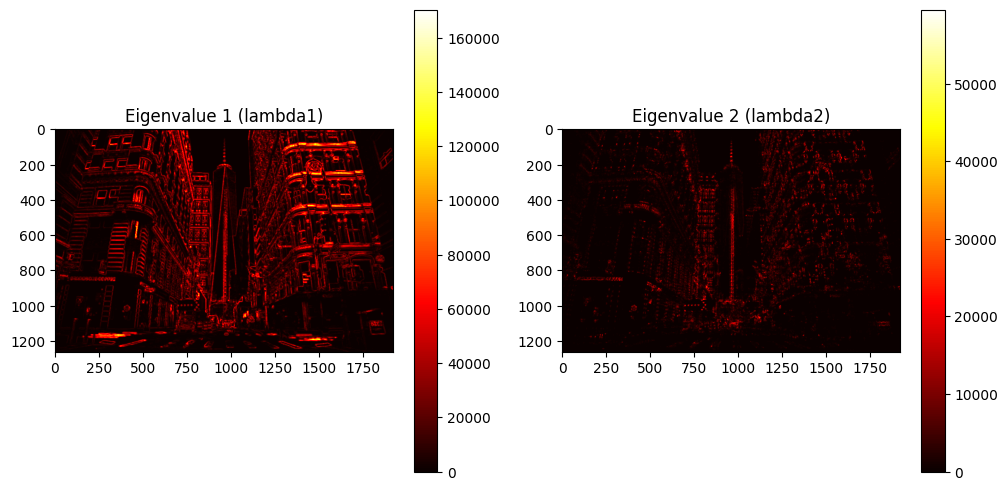

In [5]:
# Compute eigenvalues for each pixel
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        # Construct the second moment matrix M
        M = np.array([[I_x2[i, j], I_xy[i, j]],
                      [I_xy[i, j], I_y2[i, j]]])

        # Compute the eigenvalues of M
        eigenvalues = np.linalg.eigvals(M)
        lambda1[i, j] = np.max(eigenvalues)
        lambda2[i, j] = np.min(eigenvalues)

# Visualize the eigenvalues
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Eigenvalue 1 (lambda1)")
plt.imshow(lambda1, cmap='hot')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Eigenvalue 2 (lambda2)")
plt.imshow(lambda2, cmap='hot')
plt.colorbar()

plt.show()

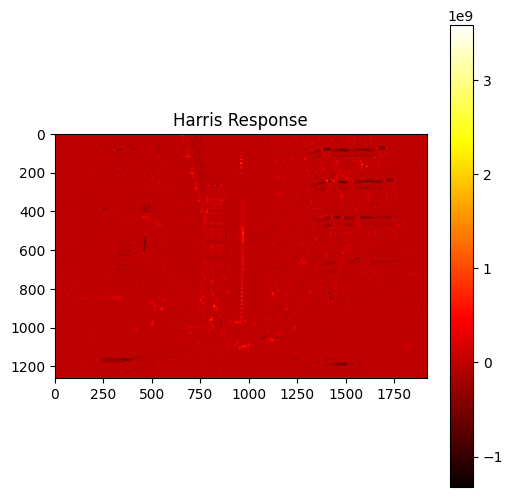

In [8]:
# Compute the Harris response
k = 0.05
Harris = lambda1 * lambda2 - k * (lambda1 + lambda2) ** 2

# Visualize the Harris response
plt.figure(figsize=(6, 6))
plt.title("Harris Response")
plt.imshow(Harris, cmap='hot')
plt.colorbar()
plt.show()


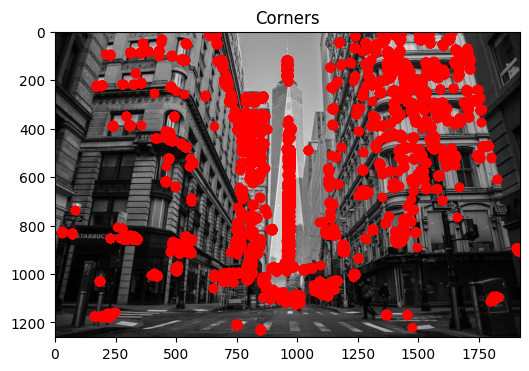

In [13]:
# Compute the corner response
R = lambda1 * lambda2 - 0.04 * (lambda1 + lambda2) ** 2

# Threshold the corner response
threshold = 0.1 * np.max(R)
corners = np.argwhere(R > threshold)

# Visualize the corners
plt.figure(figsize=(6, 6))
plt.title("Corners")
plt.imshow(img, cmap='gray')
plt.scatter(corners[:, 1], corners[:, 0], color='red')
plt.show()


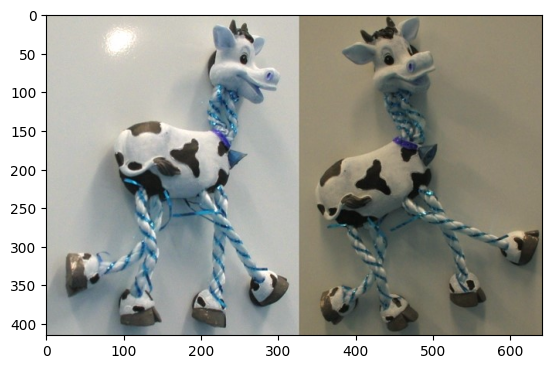

In [14]:
image = cv.imread('images\Picture1.jpg')
plt.imshow(image)

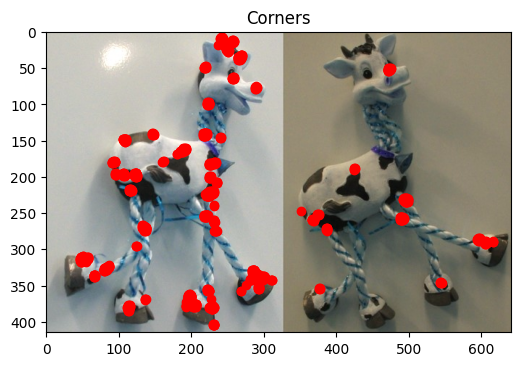

In [16]:
#compute the corner response for the image
corners = harris_corner_detector(image)

# Visualize the corners
plt.figure(figsize=(6, 6))
plt.title("Corners")
plt.imshow(image, cmap='gray')
plt.scatter(corners[:, 1], corners[:, 0], color='red')
plt.show()
